## Problem Statement I - Data Preparation

In [1]:
#Importing libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading the dataframe 

data = pd.read_csv('Global+Superstore+Data.csv')

In [3]:
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [4]:
data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [5]:
#Indexing dataframe with "Order Date" column.

data.set_index('Order Date')

,Segment,Market,Sales,Profit
Order Date,,,,
31-07-2012,Consumer,US,2309.650,762.1845
05-02-2013,Corporate,APAC,3709.395,-288.7650
17-10-2013,Consumer,APAC,5175.171,919.9710
28-01-2013,Home Office,EU,2892.510,-96.5400
05-11-2013,Consumer,Africa,2832.960,311.5200
...,...,...,...,...
19-06-2014,Corporate,APAC,65.100,4.5000
20-06-2014,Consumer,US,0.444,-1.1100
02-12-2013,Home Office,US,22.920,11.2308


In [6]:
#Concating 'Segment' and 'Market' name together in another column.

data['Market-segments'] = data['Market']+'-'+data['Segment']
data.head()

,Order Date,Segment,Market,Sales,Profit,Market-segments
0,31-07-2012,Consumer,US,2309.650,762.1845,US-Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa-Consumer


In [7]:
# Checking for number of unique values.

data['Market-segments'].nunique()

21

In [8]:
#Converting 'Order Date' column to datatime format.

data['Order Date'] = pd.to_datetime(data['Order Date']).dt.to_period('m')

In [9]:
data.head(10)

,Order Date,Segment,Market,Sales,Profit,Market-segments
0,2012-07,Consumer,US,2309.650,762.1845,US-Consumer
1,2013-05,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,2013-05,Consumer,Africa,2832.960,311.5200,Africa-Consumer
5,2013-06,Corporate,APAC,2862.675,763.2750,APAC-Corporate
6,2011-07,Consumer,APAC,1822.080,564.8400,APAC-Consumer
7,2012-04,Consumer,APAC,5244.840,996.4800,APAC-Consumer
8,2014-10,Corporate,US,5083.960,1906.4850,US-Corporate
9,2012-01,Consumer,US,4297.644,-1862.3124,US-Consumer


In [10]:
#Checking for the shape of the dataframe.

data.shape

(51290, 6)

In [11]:
group = data.pivot_table(index='Order Date', values='Profit', columns='Market-segments', aggfunc='sum')
group.head()

Market-segments,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [12]:
#train-test aplit for Monthly aggregated data

train_len = 42
train = group[0:train_len]
test = group[train_len:]

In [13]:
print(train.shape)
print(test.shape)

(42, 21)
(6, 21)


In [14]:
cov_df = pd.DataFrame()
for col in train.columns:
    cov = train[col].agg(np.std) / train[col].agg(np.mean)
    cov_df_temp = pd.DataFrame({'Market_segment': [col], 'cov':[cov]})
    cov_df = pd.concat([cov_df, cov_df_temp])
cov_df.sort_values(by='cov')

,Market_segment,cov
0,APAC-Consumer,0.529061
0,APAC-Corporate,0.536476
0,EU-Consumer,0.602430
0,LATAM-Consumer,0.692059
0,EU-Corporate,0.730829
0,LATAM-Corporate,0.892870
0,EU-Home Office,0.949443
0,APAC-Home Office,1.020441
0,US-Consumer,1.022779
0,US-Corporate,1.084821


##### Here we can see that APAC-Consumer is having the least cov ( coefficient of variance) i.e. 0.529061.

## Problem Statement II - Model Building & Evaluation

In [15]:
data.head()

,Order Date,Segment,Market,Sales,Profit,Market-segments
0,2012-07,Consumer,US,2309.650,762.1845,US-Consumer
1,2013-05,Corporate,APAC,3709.395,-288.7650,APAC-Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC-Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU-Home Office
4,2013-05,Consumer,Africa,2832.960,311.5200,Africa-Consumer


In [16]:
# Aggregate the data based on month and Sales.

grouped = data.pivot_table(index='Order Date', values='Sales', columns='Market-segments', aggfunc='sum')
grouped = pd.DataFrame(grouped.to_records())
grouped = grouped.set_index('Order Date')
grouped.head()

,APAC-Consumer,APAC-Corporate,APAC-Home Office,Africa-Consumer,Africa-Corporate,Africa-Home Office,Canada-Consumer,Canada-Corporate,Canada-Home Office,EMEA-Consumer,...,EMEA-Home Office,EU-Consumer,EU-Corporate,EU-Home Office,LATAM-Consumer,LATAM-Corporate,LATAM-Home Office,US-Consumer,US-Corporate,US-Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,18821.9898,5554.5036,4224.8856,6345.249,2979.246,1205.175,2267.94,154.23,NaN,9665.646,...,2986.866,13206.6870,9883.2675,9551.868,9784.28312,7534.99924,1670.78256,18031.312,4694.856,5758.638
2011-02,23313.3531,22817.1876,8721.1707,5245.362,212.571,3694.596,371.13,102.84,440.52,3315.570,...,1409.550,12650.0055,16410.8160,2691.045,8083.30616,4427.81020,3343.73560,8270.274,2968.244,1891.412
2011-03,26518.4919,18141.3765,1761.4152,4418.034,1131.147,324.210,729.84,NaN,174.96,7193.310,...,507.870,17964.5100,12140.0760,2813.565,13588.79612,2776.94400,2641.26400,13127.041,9646.607,32126.344
2011-04,12046.0923,7326.6621,5404.8978,4421.205,4160.841,2696.538,286.08,17.19,NaN,7117.923,...,1283.670,15610.7865,9616.6170,5328.591,17339.28948,5359.34068,4855.03048,11338.688,5036.098,8026.346
2011-05,25941.9000,15598.7889,489.7215,2990.949,2240.550,102.150,50.55,NaN,NaN,2493.114,...,297.039,19173.4380,10578.0600,1966.170,17615.67200,10066.97252,4554.62400,11678.918,16365.302,1998.522


In [17]:
# Separate only the most consistently profitable Market Segment based on cov.

gmart_seg = grouped.loc[:, ['APAC-Consumer']]
gmart_seg = gmart_seg.reset_index()
gmart_seg.head()

,Order Date,APAC-Consumer
0,2011-01,18821.9898
1,2011-02,23313.3531
2,2011-03,26518.4919
3,2011-04,12046.0923
4,2011-05,25941.9000


In [18]:
# The date type is now in type Period since we have used that for aggregation based on month
# Convert the date type to string format and then to Datetime format 
# Convert the date to index

print (f'Date type before String conversion: {gmart_seg["Order Date"].dtype}')

gmart_seg['Order Date'] = gmart_seg['Order Date'].astype(str)
print (f'Date type after String conversion: {gmart_seg["Order Date"].dtype}')

gmart_seg['Order Date'] = pd.to_datetime(gmart_seg["Order Date"], format='%Y-%m-%d')
print (f'Date type after Datetime conversion: {gmart_seg["Order Date"].dtype}')

gmart_seg = gmart_seg.set_index('Order Date')
gmart_seg.head()

Date type before String conversion: period[M]
Date type after String conversion: object
Date type after Datetime conversion: datetime64[ns]


,APAC-Consumer
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


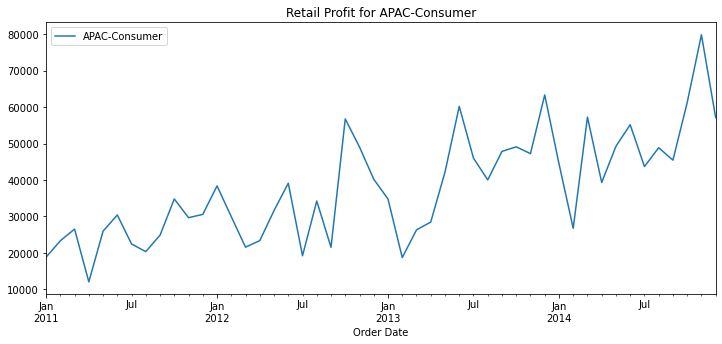

In [19]:
# Plot the data to check the trend and Seasonality

gmart_seg.plot(figsize=(12,5))
plt.legend(loc='best')
plt.title('Retail Profit for APAC-Consumer');

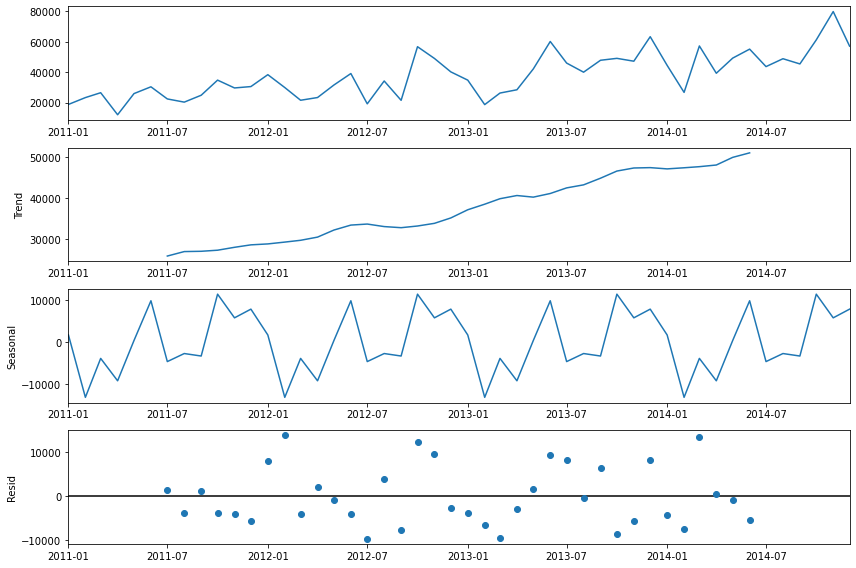

In [20]:
## Additive Seasonal Decomposition

from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize']=12,8
decomposition = sm.tsa.seasonal_decompose(gmart_seg, model='additive', freq=12)
fig = decomposition.plot()
plt.show();

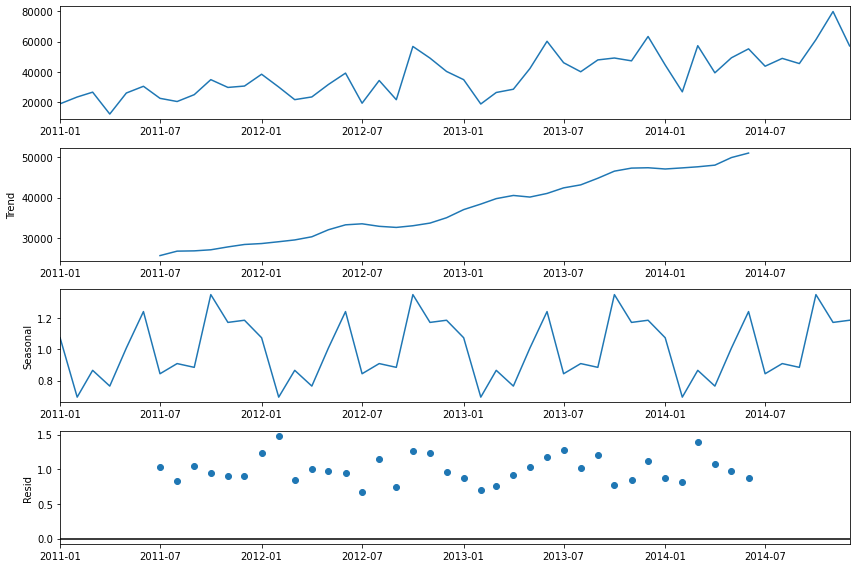

In [21]:
## Multiplicative Decomposition

decompMulti = sm.tsa.seasonal_decompose(gmart_seg, model='multiplicative', freq=12)
fig = decompMulti.plot();

### Building model

In [22]:
# train Test split for the Monthly aggregated data

train_len = 42
train_seg = gmart_seg[0:train_len]
test_seg = gmart_seg[train_len:]

In [23]:
# Checking for 42 months for train and 6 months for test.

print(train_seg.shape)
print(test_seg.shape)

(42, 1)
(6, 1)


In [24]:
#Defining function to plot model.

def plot_model(train, test, yhat_plot, name):
    plt.figure(figsize=(12,4))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(yhat_plot, label=name)
    plt.legend(loc='best')
    plt.title(name);

In [25]:
#Defining function to find out RMSE and MAPE values.

scores = pd.DataFrame()
from sklearn.metrics import mean_squared_error

def calc_error(test, yhat, name, scores):
    rmse = np.sqrt(mean_squared_error(test, yhat)).round(2)
    mape = np.round(np.mean(np.abs(test - yhat)/test)*100, 2)
    scores_tmp = pd.DataFrame({'Method': [name], 'RMSE': [rmse], 'MAPE': [mape]})
    scores = pd.concat([scores, scores_tmp])
    return scores  

### Naive method

In [26]:
yhat_naive = test_seg.copy()
yhat_naive['naive_forecast'] = train_seg['APAC-Consumer'][train_len-1]

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47


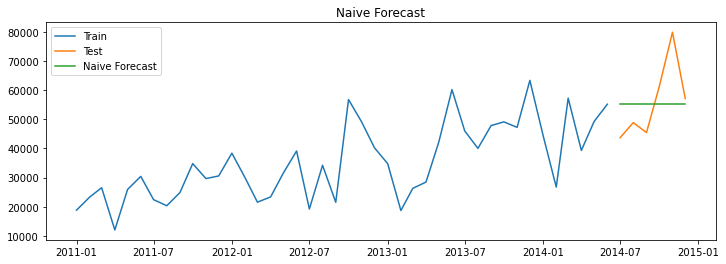

In [27]:
yhat = yhat_naive['naive_forecast']
yhat_plot = yhat_naive['naive_forecast']
name = 'Naive Forecast'
plot_model(train_seg, test_seg, yhat_plot, name)

scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

### Simple average method

In [28]:
yhat_avg = test_seg.copy()
yhat_avg['avg_forecast'] = train_seg['APAC-Consumer'].mean()

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34


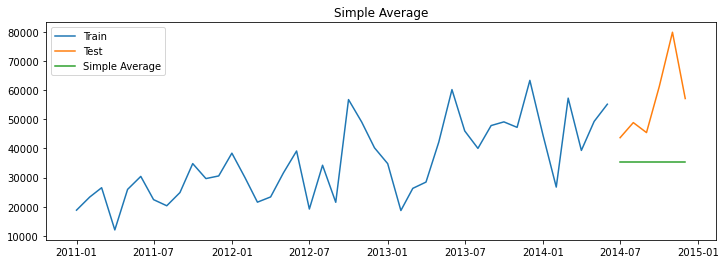

In [29]:
yhat = yhat_avg['avg_forecast']
yhat_plot = yhat_avg['avg_forecast']
name = 'Simple Average'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

### Simple moving average method

In [30]:
yhat_sma = gmart_seg.copy()
ma_win = 12

yhat_sma['sma_forecast'] = gmart_seg['APAC-Consumer'].rolling(ma_win).mean()
yhat_sma['sma_forecast'][train_len:] = yhat_sma['sma_forecast'][train_len-1]

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10


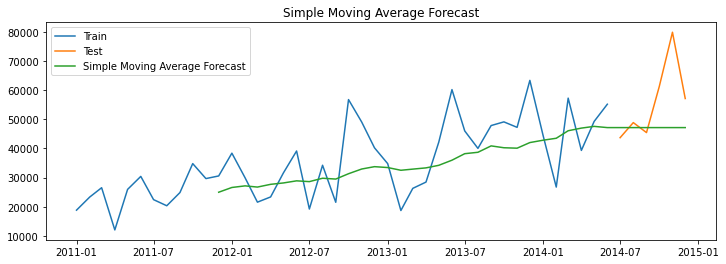

In [31]:
yhat = yhat_sma['sma_forecast'][train_len:]
yhat_plot = yhat_sma['sma_forecast']
name = 'Simple Moving Average Forecast'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

### Simple Moving Average for 6 Months

In [32]:
yhat_sma = gmart_seg.copy()
ma_win = 6

yhat_sma['sma_forecast_6'] = gmart_seg['APAC-Consumer'].rolling(ma_win).mean()
yhat_sma['sma_forecast_6'][train_len:] = yhat_sma['sma_forecast_6'][train_len-1]

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10
0,Simple Moving Average Forecast 6 months,16294.34,16.80


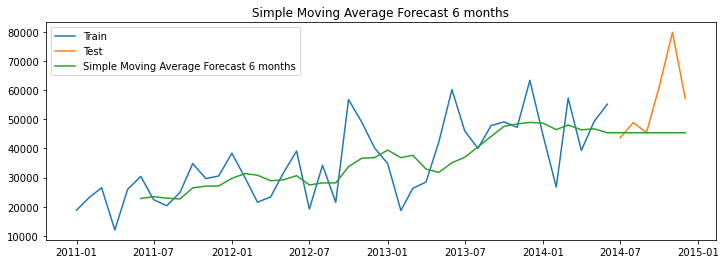

In [33]:
yhat = yhat_sma['sma_forecast_6'][train_len:]
yhat_plot = yhat_sma['sma_forecast_6']
name = 'Simple Moving Average Forecast 6 months'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

### Simple Exponential Compounding

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train_seg['APAC-Consumer'])
model_fit = model.fit(optimized=True)
model_fit.params

C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


{'smoothing_level': 0.22779854636358787,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 22912.389244366717,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [35]:
yhat_ses = test_seg.copy()
yhat_ses['ses_forecast'] = model_fit.forecast(len(yhat_ses))

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10
0,Simple Moving Average Forecast 6 months,16294.34,16.80
0,Simple Exponential Smoothing,14764.62,15.83


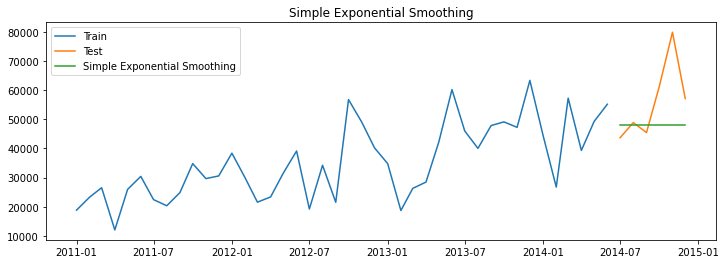

In [36]:
yhat = yhat_ses['ses_forecast']
yhat_plot = yhat_ses['ses_forecast']
name = 'Simple Exponential Smoothing'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

### Holt's exponential

In [37]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train_seg['APAC-Consumer']) ,seasonal_periods=6 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 1.0807815729718914e-05, 'smoothing_slope': 1.080605100221175e-05, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 19524.097346718583, 'initial_slope': 732.2505317142866, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [38]:
yhat_holt = test_seg.copy()
yhat_holt['holt_forecast'] = model_fit.forecast(len(test_seg))

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10
0,Simple Moving Average Forecast 6 months,16294.34,16.80
0,Simple Exponential Smoothing,14764.62,15.83
0,Holts Exponential Smoothing,11920.63,14.67


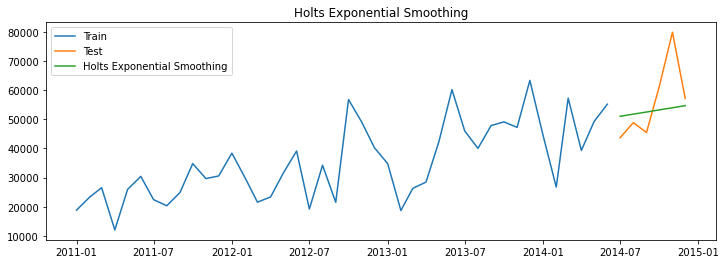

In [39]:
yhat = yhat_holt['holt_forecast']
yhat_plot = yhat_holt['holt_forecast']
name = 'Holts Exponential Smoothing'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

### Holt Winter's additive method with trend and seasonality

In [40]:
model = ExponentialSmoothing(np.asarray(train_seg['APAC-Consumer']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 0.02678384803939267, 'smoothing_slope': 0.026777354752893792, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 30346.668869925015, 'initial_slope': 648.7409859639534, 'initial_seasons': array([ -9487.35114762, -19480.99291258, -12030.36339137, -19946.64066905,
        -9183.5387898 ,   -997.20870819, -14180.3778479 , -12947.80620393,
       -13258.02707214,   1015.32305491,  -4543.97300459,  -2658.27224893]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [41]:
yhat_hwa = test_seg.copy()
yhat_hwa['hw_forecast'] = model_fit.forecast(len(test_seg))

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10
0,Simple Moving Average Forecast 6 months,16294.34,16.80
0,Simple Exponential Smoothing,14764.62,15.83
0,Holts Exponential Smoothing,11920.63,14.67
0,Holts Winters additive Smoothing,9309.63,7.73


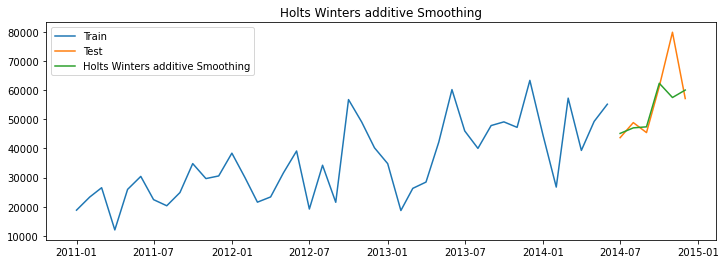

In [42]:
yhat = yhat_hwa['hw_forecast']
yhat_plot = yhat_hwa['hw_forecast']
name = 'Holts Winters additive Smoothing'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

## Holt Winter's multiplicative method with trend and seasonality

In [43]:
model = ExponentialSmoothing(np.asarray(train_seg['APAC-Consumer']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)

{'smoothing_level': 4.97209723922029e-06, 'smoothing_slope': 4.971066670615362e-06, 'smoothing_seasonal': 1.5004773627714293e-05, 'damping_slope': nan, 'initial_level': 34110.96529713082, 'initial_slope': 730.4174239291785, 'initial_seasons': array([0.71582824, 0.48630976, 0.68194983, 0.53165285, 0.73801385,
       0.90143927, 0.62459799, 0.6570582 , 0.64888917, 0.93169429,
       0.82768087, 0.88416963]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [44]:
yhat_hwm = test_seg.copy()
yhat_hwm['hwm_forecast'] = model_fit.forecast(len(test_seg))

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10
0,Simple Moving Average Forecast 6 months,16294.34,16.80
0,Simple Exponential Smoothing,14764.62,15.83
0,Holts Exponential Smoothing,11920.63,14.67
0,Holts Winters additive Smoothing,9309.63,7.73
0,Holts Winters mul Smoothing,9977.52,10.12


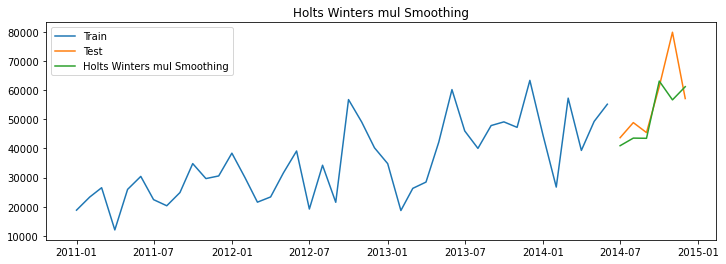

In [45]:
yhat = yhat_hwm['hwm_forecast']
yhat_plot = yhat_hwm['hwm_forecast']
name = 'Holts Winters mul Smoothing'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

###  ADF Augmented Dickey Fuller Test

In [46]:
gmart_seg.head()

,APAC-Consumer
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [47]:
gmart_seg.index

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01', '2011-11-01', '2011-12-01',
               '2012-01-01', '2012-02-01', '2012-03-01', '2012-04-01',
               '2012-05-01', '2012-06-01', '2012-07-01', '2012-08-01',
               '2012-09-01', '2012-10-01', '2012-11-01', '2012-12-01',
               '2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01', '2014-07-01', '2014-08-01',
               '2014-09-01', '2014-10-01', '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', name='Order Date', freq=None)

In [48]:
len(gmart_seg)

48

###  Box-Cox Transformation

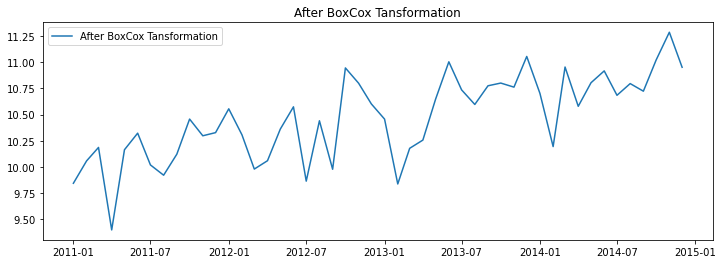

In [49]:
from scipy.stats import boxcox
gmart_seg_bc = pd.Series(boxcox(gmart_seg['APAC-Consumer'], lmbda=0) , index=gmart_seg.index)

plt.figure(figsize=(12,4))
plt.plot(gmart_seg_bc, label=('After BoxCox Tansformation'))
plt.legend(loc='best')
plt.title('After BoxCox Tansformation');

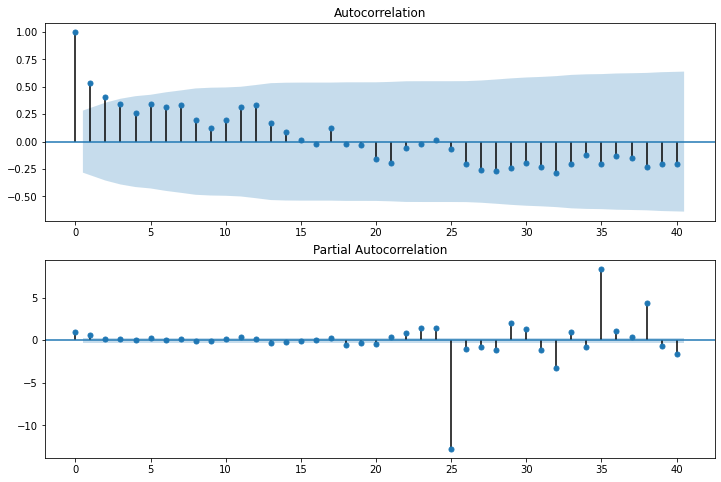

In [50]:
# Auto Correltation plot and Partial Auto Correlaton plot for BoxCox Transfored data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(gmart_seg_bc, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(gmart_seg_bc, lags=40, ax=ax2)

### Differencing

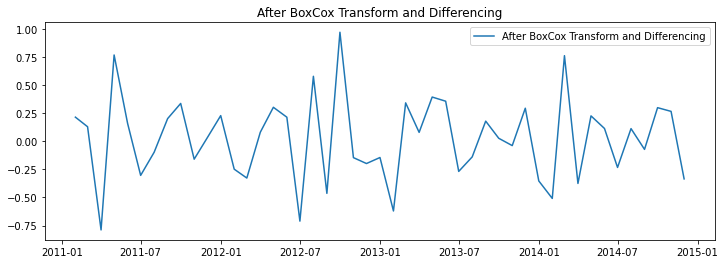

In [51]:
gmart_seg_bc_diff = pd.Series(gmart_seg_bc - gmart_seg_bc.shift(), index=gmart_seg.index)
gmart_seg_bc_diff.dropna(inplace=True)

plt.figure(figsize=(12,4))
plt.plot(gmart_seg_bc_diff, label='After BoxCox Transform and Differencing')
plt.legend(loc='best')
plt.title('After BoxCox Transform and Differencing');

In [52]:
from statsmodels.tsa.stattools import adfuller
adf_tests = adfuller(gmart_seg_bc_diff)
print (adf_tests)
print('ADF Statistic: %f' % adf_tests[0])
print('Critical Values @ 0.05: %.2f' % adf_tests[4]['5%'])
print('p-value: %f' % adf_tests[1])

(-4.53501132405436, 0.00016989676321143513, 10, 36, {'1%': -3.626651907578875, '5%': -2.9459512825788754, '10%': -2.6116707716049383}, 20.42104412162388)
ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


### Auto Correlation Funtion ACF

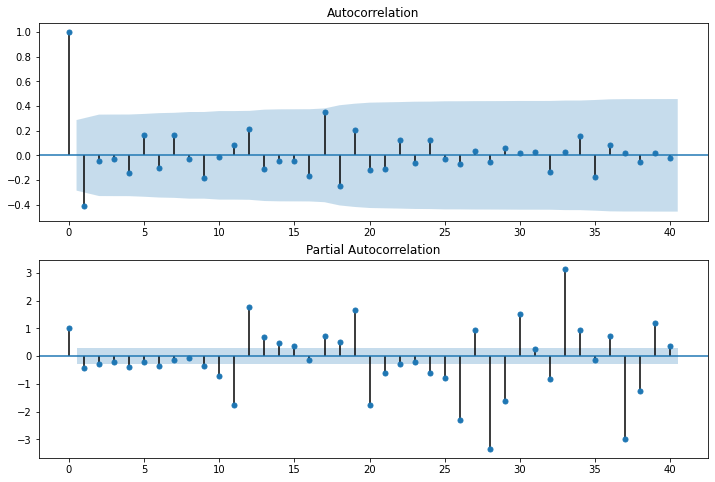

In [53]:
# Auto Correltation plot and Partial Auto Correlaton plot for BoxCox Transformed and differenced data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(gmart_seg_bc_diff, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(gmart_seg_bc_diff, lags=40, ax=ax2)

### Split data into train and test data sets

In [54]:
train_seg_bc = gmart_seg_bc[:train_len]
test_seg_bc = gmart_seg_bc[train_len:]
print (len(train_seg_bc), len(test_seg_bc))

train_seg_bc_diff = gmart_seg_bc_diff[:train_len-1]
test_seg_bc_diff = gmart_seg_bc_diff[train_len-1:]
print (len(train_seg_bc_diff), len(test_seg_bc_diff))

42 6
41 6


### Auto Regression Method

In [55]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_seg_bc_diff , order=(1,0,0))
model_fit = model.fit()
print (model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [56]:
yhat_ar = gmart_seg_bc_diff.copy()
yhat_ar['ar_forecast_bc_diff'] = model_fit.predict(gmart_seg_bc_diff.index.min(), gmart_seg_bc_diff.index.max())
yhat_ar['ar_forecast_bc'] = yhat_ar['ar_forecast_bc_diff'].cumsum()
yhat_ar['ar_forecast_bc'] = yhat_ar['ar_forecast_bc'].add(gmart_seg_bc[0])
yhat_ar['ar_forecast'] = np.exp(yhat_ar['ar_forecast_bc'])

In [57]:
test_seg.index.min()

Timestamp('2014-07-01 00:00:00')

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10
0,Simple Moving Average Forecast 6 months,16294.34,16.80
0,Simple Exponential Smoothing,14764.62,15.83
0,Holts Exponential Smoothing,11920.63,14.67
0,Holts Winters additive Smoothing,9309.63,7.73
0,Holts Winters mul Smoothing,9977.52,10.12
0,Auto Regression Forecast,10985.28,13.56


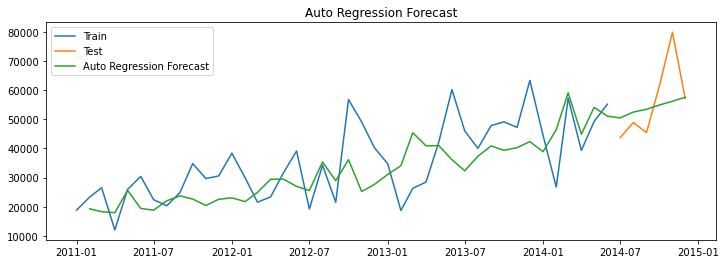

In [58]:
yhat = yhat_ar['ar_forecast'][test_seg.index.min():]
yhat_plot = yhat_ar['ar_forecast']
name = 'Auto Regression Forecast'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

### Moving Average Model

In [59]:
model = ARIMA(train_seg_bc_diff, order =(0, 0, 1))
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [60]:
gmart_seg_bc_diff.index.min(), gmart_seg_bc_diff.index.max()

(Timestamp('2011-02-01 00:00:00'), Timestamp('2014-12-01 00:00:00'))

In [61]:
yhat_ma = gmart_seg_bc_diff.copy()
yhat_ma['ma_forecast_bc_diff'] = model_fit.predict(gmart_seg_bc_diff.index.min(), gmart_seg_bc_diff.index.max())
yhat_ma['ma_forecast_bc'] = yhat_ma['ma_forecast_bc_diff'].cumsum()
yhat_ma['ma_forecast_bc'] = yhat_ma['ma_forecast_bc'].add(gmart_seg_bc[0])
yhat_ma['ma_forecast'] = np.exp(yhat_ma['ma_forecast_bc'])

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10
0,Simple Moving Average Forecast 6 months,16294.34,16.80
0,Simple Exponential Smoothing,14764.62,15.83
0,Holts Exponential Smoothing,11920.63,14.67
0,Holts Winters additive Smoothing,9309.63,7.73
0,Holts Winters mul Smoothing,9977.52,10.12
0,Auto Regression Forecast,10985.28,13.56
0,Moving Average Method,23360.02,33.93


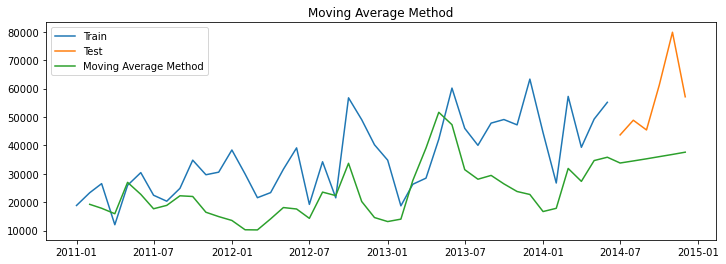

In [62]:
yhat = yhat_ma['ma_forecast'][test_seg.index.min():]
yhat_plot = yhat_ma['ma_forecast']
name = 'Moving Average Method'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

###  Auto Regressive Moving Average model

In [63]:
model = ARIMA(train_seg_bc_diff, order = (1,0,1))
model_fit = model.fit()
print (model_fit.params)

C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


### Recover Original Entries

In [64]:
yhat_arma = gmart_seg_bc_diff.copy()
yhat_arma['arma_forecast_bc_diff'] = model_fit.predict(gmart_seg_bc_diff.index.min(), gmart_seg_bc_diff.index.max())
yhat_arma['arma_forecast_bc'] = yhat_arma['arma_forecast_bc_diff'].cumsum()
yhat_arma['arma_forecast_bc'] = yhat_arma['arma_forecast_bc'].add(gmart_seg_bc[0])
yhat_arma['arma_forecast'] = np.exp(yhat_arma['arma_forecast_bc'])

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10
0,Simple Moving Average Forecast 6 months,16294.34,16.80
0,Simple Exponential Smoothing,14764.62,15.83
0,Holts Exponential Smoothing,11920.63,14.67
0,Holts Winters additive Smoothing,9309.63,7.73
0,Holts Winters mul Smoothing,9977.52,10.12
0,Auto Regression Forecast,10985.28,13.56
0,Moving Average Method,23360.02,33.93


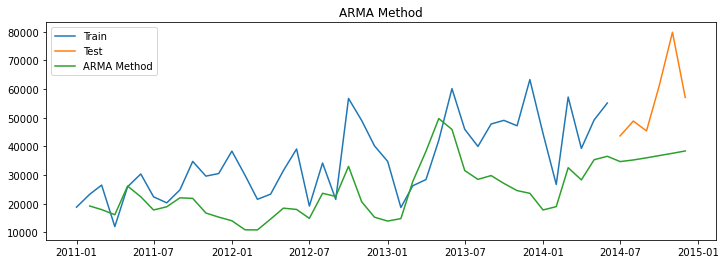

In [65]:
yhat = yhat_arma['arma_forecast'][test_seg.index.min():]
yhat_plot = yhat_arma['arma_forecast']
name = 'ARMA Method'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

### ARIMA Method ( Auto Regressive Integrated Moving Average)

In [66]:
model = ARIMA(train_seg_bc, order=(1,1,1))
model_fit = model.fit()
print (model_fit.params)

C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


### Recover the Original Time series forecast

In [67]:
yhat_arima = gmart_seg_bc_diff.copy()
yhat_arima['arima_forecast_bc_diff'] = model_fit.predict(gmart_seg_bc_diff.index.min(), gmart_seg_bc_diff.index.max())
yhat_arima['arima_forecast_bc'] = yhat_arima['arima_forecast_bc_diff'].cumsum()
yhat_arima['arima_forecast_bc'] = yhat_arima['arima_forecast_bc'].add(gmart_seg_bc[0])
yhat_arima['arima_forecast'] = np.exp(yhat_arima['arima_forecast_bc'])

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10
0,Simple Moving Average Forecast 6 months,16294.34,16.80
0,Simple Exponential Smoothing,14764.62,15.83
0,Holts Exponential Smoothing,11920.63,14.67
0,Holts Winters additive Smoothing,9309.63,7.73
0,Holts Winters mul Smoothing,9977.52,10.12
0,Auto Regression Forecast,10985.28,13.56
0,Moving Average Method,23360.02,33.93


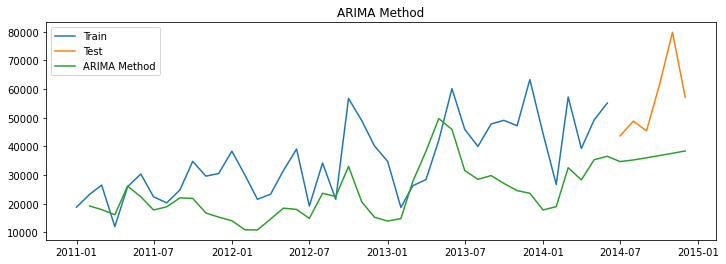

In [68]:
yhat = yhat_arima['arima_forecast'][test_seg.index.min():]
yhat_plot = yhat_arima['arima_forecast']
name = 'ARIMA Method'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

### Seasonal ARIMA model

In [69]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [70]:
model = SARIMAX(train_seg_bc, order=(1,1,1), seasonal_order=(1,1,1,12))
model_fit = model.fit()
print(model_fit.params)

C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1      -0.041710
ma.L1      -0.997507
ar.S.L12    0.100077
ma.S.L12   -0.975828
sigma2      0.057991
dtype: float64


### Recover Original Time series forecast

In [71]:
yhat_sarima = gmart_seg_bc_diff.copy()
yhat_sarima['sarima_forecast_bc'] = model_fit.predict(gmart_seg_bc_diff.index.min(), gmart_seg_bc_diff.index.max())
yhat_sarima['sarima_forecast'] = np.exp(yhat_sarima['sarima_forecast_bc'])

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10
0,Simple Moving Average Forecast 6 months,16294.34,16.80
0,Simple Exponential Smoothing,14764.62,15.83
0,Holts Exponential Smoothing,11920.63,14.67
0,Holts Winters additive Smoothing,9309.63,7.73
0,Holts Winters mul Smoothing,9977.52,10.12
0,Auto Regression Forecast,10985.28,13.56
0,Moving Average Method,23360.02,33.93


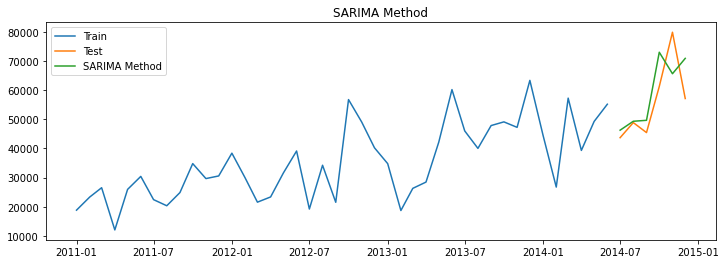

In [72]:
yhat_plot = yhat = yhat_sarima['sarima_forecast'][test_seg.index.min():]
name = 'SARIMA Method'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

###  Seasonal ARIMA for 6 months period

In [73]:
model = SARIMAX(train_seg_bc, order=(1,1,1), seasonal_order=(1,1,1,6))
model_fit = model.fit()
print(model_fit.params)

C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1     -0.088959
ma.L1     -0.992263
ar.S.L6   -0.292516
ma.S.L6   -0.972908
sigma2     0.062384
dtype: float64


### Recover Original Time series forecast

In [74]:
yhat_sarima = gmart_seg_bc_diff.copy()
yhat_sarima['sarima_forecast_bc_6'] = model_fit.predict(gmart_seg_bc_diff.index.min(), gmart_seg_bc_diff.index.max())
yhat_sarima['sarima_forecast_6'] = np.exp(yhat_sarima['sarima_forecast_bc_6'])

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10
0,Simple Moving Average Forecast 6 months,16294.34,16.80
0,Simple Exponential Smoothing,14764.62,15.83
0,Holts Exponential Smoothing,11920.63,14.67
0,Holts Winters additive Smoothing,9309.63,7.73
0,Holts Winters mul Smoothing,9977.52,10.12
0,Auto Regression Forecast,10985.28,13.56
0,Moving Average Method,23360.02,33.93


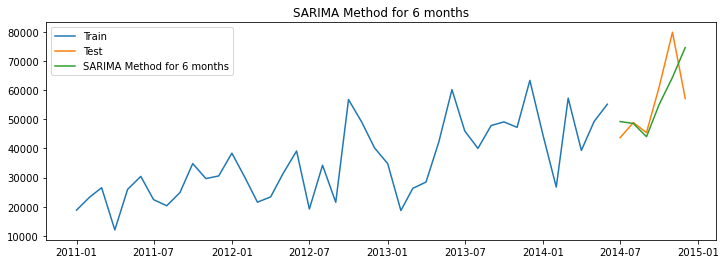

In [75]:
yhat = yhat_plot = yhat_sarima['sarima_forecast_6'][test_seg.index.min():]
name = 'SARIMA Method for 6 months'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

###  Seasonal ARIMA for 3 months period

In [76]:
model = SARIMAX(train_seg_bc, order=(1,1,1), seasonal_order=(1,1,1,3))
model_fit = model.fit()
print(model_fit.params)

C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


ar.L1      0.058403
ma.L1     -0.996756
ar.S.L3   -0.148660
ma.S.L3   -0.894543
sigma2     0.085937
dtype: float64


C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


### Recover Original Time series forecast

In [77]:
yhat_sarima = gmart_seg_bc_diff.copy()
yhat_sarima['sarima_forecast_bc_3'] = model_fit.predict(gmart_seg_bc_diff.index.min(), gmart_seg_bc_diff.index.max())
yhat_sarima['sarima_forecast_3'] = np.exp(yhat_sarima['sarima_forecast_bc_3'])

,Method,RMSE,MAPE
0,Naive Forecast,12355.97,17.47
0,Simple Average,24146.06,34.34
0,Simple Moving Average Forecast,15192.01,16.10
0,Simple Moving Average Forecast 6 months,16294.34,16.80
0,Simple Exponential Smoothing,14764.62,15.83
0,Holts Exponential Smoothing,11920.63,14.67
0,Holts Winters additive Smoothing,9309.63,7.73
0,Holts Winters mul Smoothing,9977.52,10.12
0,Auto Regression Forecast,10985.28,13.56
0,Moving Average Method,23360.02,33.93


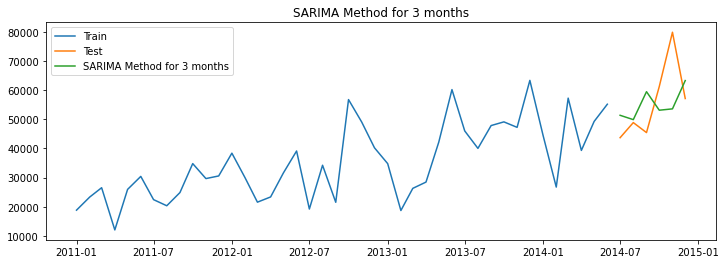

In [78]:
yhat = yhat_plot = yhat_sarima['sarima_forecast_3'][test_seg.index.min():]
name = 'SARIMA Method for 3 months'
plot_model(train_seg, test_seg, yhat_plot, name)
scores = calc_error(test_seg['APAC-Consumer'], yhat, name, scores)
scores

#### Holt's Winters additive smoothin works best as the MAPE value is the lowest from all the other methods.

## Final prediction

In [80]:
model_final = ExponentialSmoothing(gmart_seg['APAC-Consumer'],
                                   seasonal_periods=12 ,trend='add', seasonal='add').fit()
pred_final = model_final.forecast(6)
pred_final

C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\Akshay Naik\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


2015-01-01    54530.436044
2015-02-01    47402.329011
2015-03-01    54981.935673
2015-04-01    47014.266080
2015-05-01    59043.295840
2015-06-01    67474.961449
Freq: MS, dtype: float64